# Start The Program

# Import Library

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier, 
                              RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras models
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Flatten, 
                                     Dense, Dropout, GlobalAveragePooling1D, 
                                     BatchNormalization, Add, Bidirectional, LSTM, 
                                     Attention)
from tensorflow.keras.utils import to_categorical

# Dataset Load

In [2]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

Class 1 data sample

In [3]:
data.head()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
0,GKPRPYSPRPTSHPRPIRV,2198.56,12.01,1490.0,30.0,41.15,35.79,-1.579,10.0,5.0,3.65,0.5017,no evidence,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,3448.09,8.68,10345.0,4.4,55.71,65.33,0.3,53.0,3.0,1.07,0.4636,no evidence,1
2,FLFPLITSFLSKVL,1625.03,8.75,NaN,1.1,16.98,160.00,1.75,64.0,1.0,-1.61,0.4303,no evidence,1
3,SNDIYFNFQR,1303.40,5.55,1490.0,1.9,-6.03,39.00,-1.05,30.0,0.0,3.51,0.5745,strong evidence,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,2594.18,8.61,NaN,30.0,25.92,159.60,1.224,60.0,1.5,-1.13,0.4590,no evidence,1


Class 0 data sample

In [4]:
data.tail()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
3881,LTKYALVAVIVLCLTVLGFTLLAGDSLCEFTVKERNIEFRAVLAYEPKK,5460.56,8.00,3105.0,5.5,43.01,133.27,0.747,55.0,1.00,0.15,1.1777,no evidence,0
3882,SNTFVAVEFSWLYAISLILPCETIRVAWAPKRAYHGTSEEKRRLAPADI,5578.43,7.91,13980.0,1.9,65.50,95.71,0.033,47.0,1.25,1.27,-0.0513,no evidence,0
3883,AVPKRRKSRSNTRHRRSQWKAAAPDLVPIVVDGERRLVPRPLVRYFQQG,5749.68,12.01,6990.0,4.4,92.14,75.51,-0.967,33.0,10.25,3.52,0.9008,no evidence,0
3884,IDHRCGREATPPGKLCNDGRCCSQWGWCGTTQAYCSGKCQSQCDCNRDL,5413.04,7.68,12990.0,20.0,23.34,27.96,-0.867,33.0,1.25,2.66,1.1166,no evidence,0
3885,HLRNHFGSKPFKCNKCNYACVNKSMLNSHMKSHTNVYQYRCADCTY...,5907.77,9.43,7700.0,3.5,33.52,33.20,-0.874,32.0,8.00,2.33,0.7596,no evidence,0


# Pre-processing

In [5]:
data.shape

(3886, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    Sequence                    3886 non-null   object 
 1   molecular 
weight            3881 non-null   float64
 2   Theoretical Pi               3881 non-null   float64
 3   Extinction 
coefficient      2896 non-null   float64
 4   Half life
(hours)            3881 non-null   float64
 5   Instability
 index           3881 non-null   float64
 6   Aliphatic
 index             3881 non-null   float64
 7   GRAVY                        3879 non-null   object 
 8   Hydrophobic 
residue :       3771 non-null   float64
 9   Net charge:                  3771 non-null   float64
 10  Boman Index:
(Kcal/mol)      3770 non-null   float64
 11  Protective Antigenic
 Score  3867 non-null   float64
 12  Allergenicity                3884 non-null   object 
 13  property = 1      

In [7]:
data.isnull().sum()

 Sequence                         0
molecular \nweight                5
Theoretical Pi                    5
Extinction \ncoefficient        990
Half life\n(hours)                5
Instability\n index               5
Aliphatic\n index                 5
GRAVY                             7
Hydrophobic \nresidue :         115
Net charge:                     115
Boman Index:\n(Kcal/mol)        116
Protective Antigenic\n Score     19
Allergenicity                     2
property = 1                      0
dtype: int64

In [8]:
data.head()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
0,GKPRPYSPRPTSHPRPIRV,2198.56,12.01,1490.0,30.0,41.15,35.79,-1.579,10.0,5.0,3.65,0.5017,no evidence,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,3448.09,8.68,10345.0,4.4,55.71,65.33,0.3,53.0,3.0,1.07,0.4636,no evidence,1
2,FLFPLITSFLSKVL,1625.03,8.75,NaN,1.1,16.98,160.00,1.75,64.0,1.0,-1.61,0.4303,no evidence,1
3,SNDIYFNFQR,1303.40,5.55,1490.0,1.9,-6.03,39.00,-1.05,30.0,0.0,3.51,0.5745,strong evidence,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,2594.18,8.61,NaN,30.0,25.92,159.60,1.224,60.0,1.5,-1.13,0.4590,no evidence,1


# For Machine Learning Algorithm

In [9]:
# Convert non-numeric values to NaN for numeric columns
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values for numerical columns with their mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for the categorical column 'Allergenicity' with the most frequent value
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

numeric_columns = ['molecular weight', 'Extinction coefficient', 'Theoretical Pi',
                   'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
                   'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
                   'Protective Antigenic Score', 'Allergenicity']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Data Distribution

property = 1
1    2082
0    1804
Name: count, dtype: int64


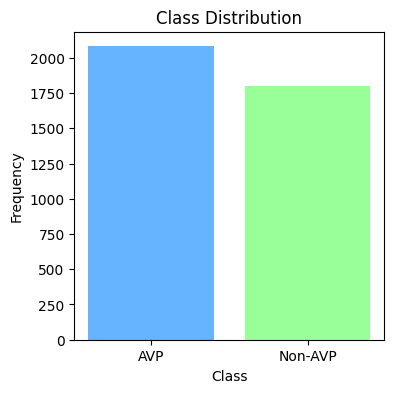

In [10]:
class_counts = data['property = 1'].value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution before SMOTE for tarin set

property = 1
1    1649
0    1459
Name: count, dtype: int64


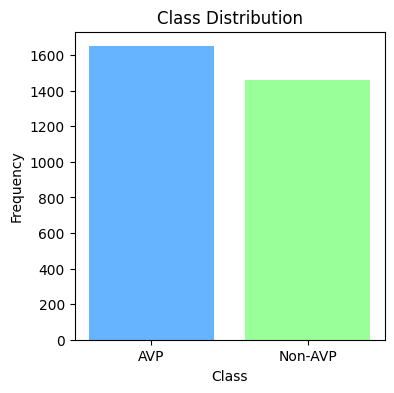

In [11]:
class_counts = y_train.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution After SMOTE for tarin set

property = 1
1    1649
0    1649
Name: count, dtype: int64


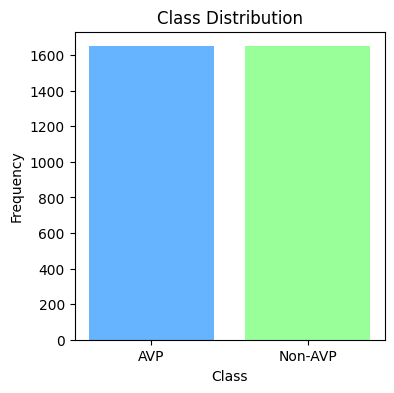

In [12]:
class_counts =  y_train_balanced.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Model Creation

In [13]:
# New ensemble classifiers
ensemble1 = VotingClassifier(estimators=[
    ('gb',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)             # Seed for reproducibility
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble2 = StackingClassifier(estimators=[
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42))

ensemble3 = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('brf', BalancedRandomForestClassifier(
        n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble4 = StackingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=BalancedRandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0))

# Machine Learning Algorithm

In [14]:
# Add this to your classifiers dictionary
classifiers = {
    'SVM': SVC(probability=True, C=1.0, gamma='scale', 
               shrinking=True, tol=1e-3, cache_size=200, verbose=False, max_iter=-1, 
               decision_function_shape='ovr', break_ties=False),
    
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                            min_samples_split=2, min_samples_leaf=1),
    
    'Extra Tree': ExtraTreesClassifier(n_estimators=100, max_depth=5), 
    
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, 
                                   min_samples_leaf=1, random_state=42),
    
    'Logistic Regression': LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                             C=1.0, fit_intercept=True, 
                                             intercept_scaling=1, 
                                             max_iter=100,
                                             verbose=0, warm_start=False),
    
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                       min_samples_split=2, min_samples_leaf=1),
    
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, leaf_size=30),
    
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                                    solver='adam', alpha=0.0001, batch_size='auto', 
                                    learning_rate='constant', learning_rate_init=0.001, 
                                    power_t=0.5, max_iter=200, shuffle=True, 
                                    random_state=None, tol=0.0001, 
                                    verbose=False, warm_start=False, 
                                    momentum=0.9, nesterovs_momentum=True, 
                                    early_stopping=False, validation_fraction=0.1, 
                                    beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    
    'Naive Bayes': GaussianNB(priors=None, var_smoothing=1e-09),
    
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
    
    'Balanced RF': BalancedRandomForestClassifier(
        n_estimators=100, random_state=42),
    
    'Ensemble 1': ensemble1,
    'Ensemble 2': ensemble2,
    'Ensemble 3': ensemble3,
    'Ensemble 4': ensemble4
}

# Result Analysis

Model: SVM
Accuracy: 0.7506426735218509
Confusion Matrix:
[[219 126]
 [ 68 365]]
F1 Score: 0.79004329004329
Recall: 0.8429561200923787
Precision: 0.7433808553971487
Mean Absolute Error: 0.2493573264781491
Root Mean Squared Error: 0.49935691291715295
ROC AUC Score: 0.7388693643940154
Specificity: 0.6347826086956522
Matthews Correlation Coefficient: 0.49188349580223995


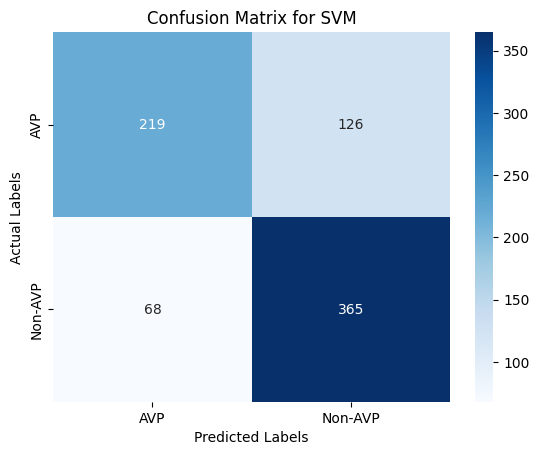

---------------------------------------
Model: Decision Tree
Accuracy: 0.7146529562982005
Confusion Matrix:
[[283  62]
 [160 273]]
F1 Score: 0.7109375
Recall: 0.6304849884526559
Precision: 0.8149253731343283
Mean Absolute Error: 0.2853470437017995
Root Mean Squared Error: 0.534178849919949
ROC AUC Score: 0.7253874217625598
Specificity: 0.8202898550724638
Matthews Correlation Coefficient: 0.4522607518490532


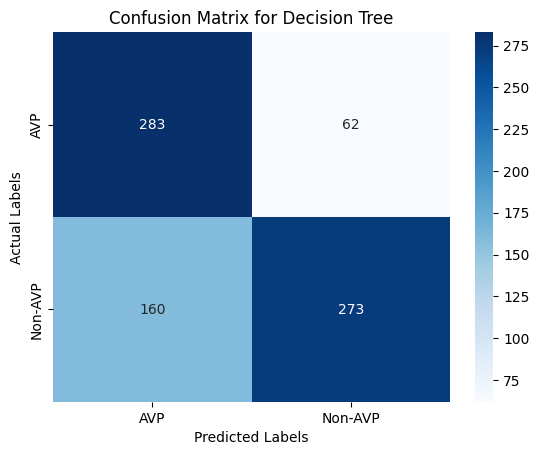

---------------------------------------
Model: Extra Tree
Accuracy: 0.7287917737789203
Confusion Matrix:
[[239 106]
 [105 328]]
F1 Score: 0.756632064590542
Recall: 0.7575057736720554
Precision: 0.7557603686635944
Mean Absolute Error: 0.2712082262210797
Root Mean Squared Error: 0.5207765607447015
ROC AUC Score: 0.7251296984302306
Specificity: 0.6927536231884058
Matthews Correlation Coefficient: 0.4503935836970008


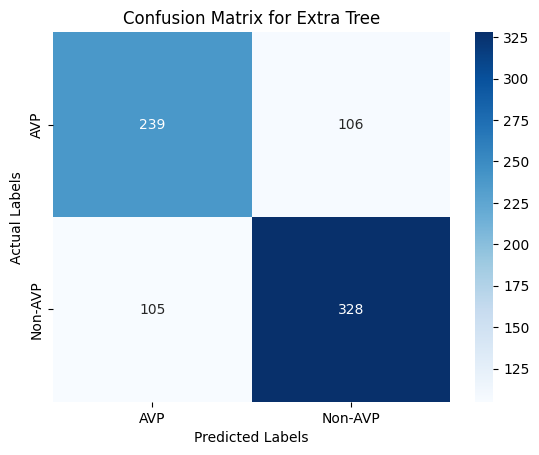

---------------------------------------
Model: Random Forest
Accuracy: 0.7609254498714653
Confusion Matrix:
[[230 115]
 [ 71 362]]
F1 Score: 0.7956043956043954
Recall: 0.836027713625866
Precision: 0.7589098532494759
Mean Absolute Error: 0.2390745501285347
Root Mean Squared Error: 0.48895250293718173
ROC AUC Score: 0.7513471901462664
Specificity: 0.6666666666666666
Matthews Correlation Coefficient: 0.51276112132651


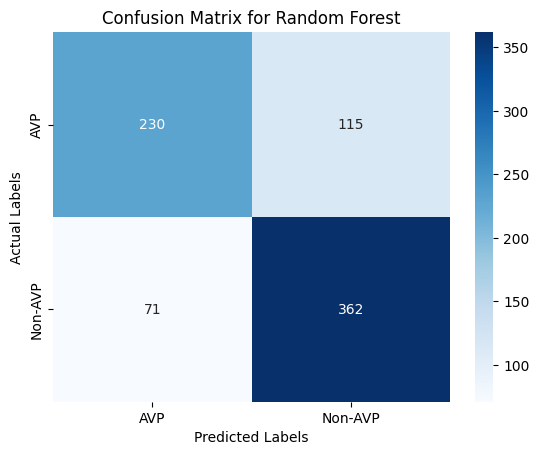

---------------------------------------
Model: Logistic Regression
Accuracy: 0.7069408740359897
Confusion Matrix:
[[227 118]
 [110 323]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.7391304347826086
Recall: 0.745958429561201
Precision: 0.7324263038548753
Mean Absolute Error: 0.2930591259640103
Root Mean Squared Error: 0.5413493566672175
ROC AUC Score: 0.7019647220269774
Specificity: 0.6579710144927536
Matthews Correlation Coefficient: 0.40497178130774597


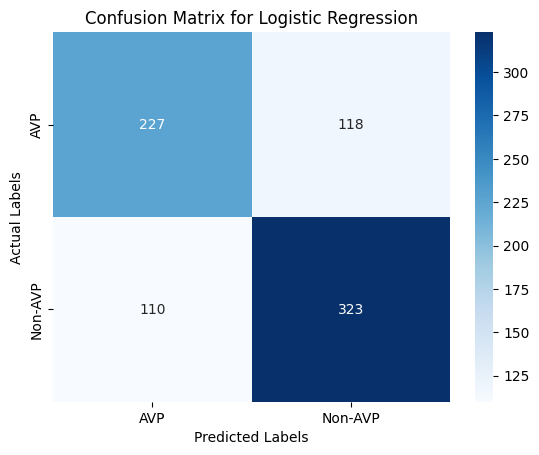

---------------------------------------
Model: Gradient Boosting
Accuracy: 0.8586118251928021
Confusion Matrix:
[[289  56]
 [ 54 379]]
F1 Score: 0.8732718894009216
Recall: 0.8752886836027713
Precision: 0.871264367816092
Mean Absolute Error: 0.14138817480719795
Root Mean Squared Error: 0.37601618955464927
ROC AUC Score: 0.8564849215115306
Specificity: 0.8376811594202899
Matthews Correlation Coefficient: 0.7133997746257651


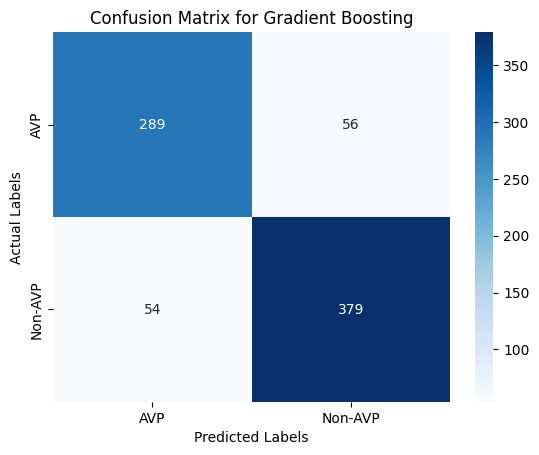

---------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7519280205655527
Confusion Matrix:
[[271  74]
 [119 314]]
F1 Score: 0.7649208282582216
Recall: 0.7251732101616628
Precision: 0.8092783505154639
Mean Absolute Error: 0.2480719794344473
Root Mean Squared Error: 0.49806824776776054
ROC AUC Score: 0.7553402282692371
Specificity: 0.7855072463768116
Matthews Correlation Coefficient: 0.5074047954151631


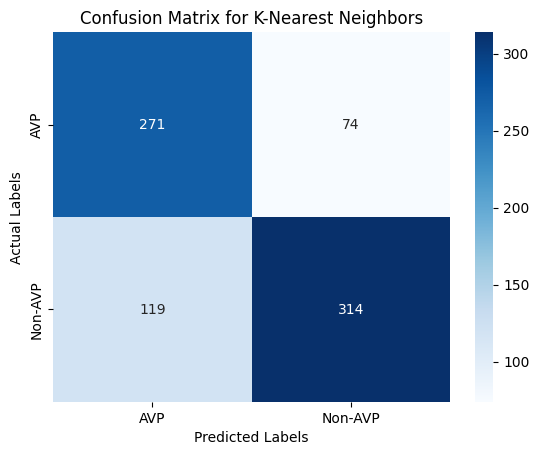

---------------------------------------
Model: Neural Network


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.7686375321336761
Confusion Matrix:
[[262  83]
 [ 97 336]]
F1 Score: 0.7887323943661972
Recall: 0.7759815242494227
Precision: 0.801909307875895
Mean Absolute Error: 0.23136246786632392
Root Mean Squared Error: 0.4810015258461494
ROC AUC Score: 0.7677009070522477
Specificity: 0.7594202898550725
Matthews Correlation Coefficient: 0.5335548823494355


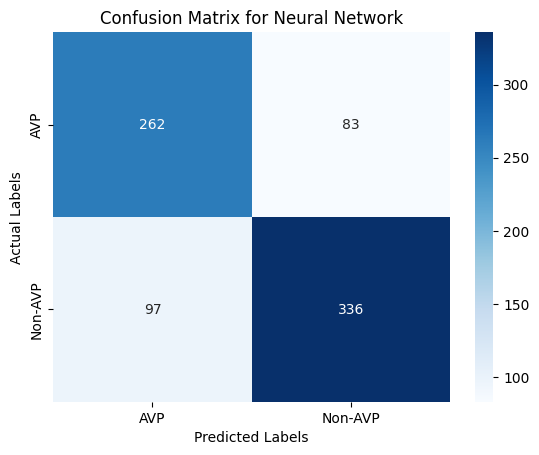

---------------------------------------
Model: Naive Bayes
Accuracy: 0.6863753213367609
Confusion Matrix:
[[181 164]
 [ 80 353]]
F1 Score: 0.7431578947368421
Recall: 0.815242494226328
Precision: 0.6827852998065764
Mean Absolute Error: 0.31362467866323906
Root Mean Squared Error: 0.5600220340872661
ROC AUC Score: 0.669940087692874
Specificity: 0.5246376811594203
Matthews Correlation Coefficient: 0.35761341685290327


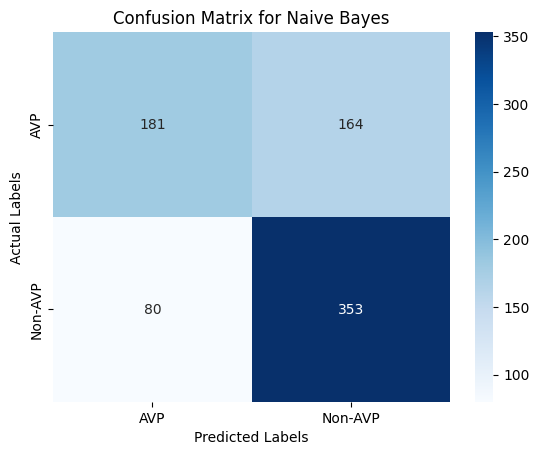

---------------------------------------
Model: AdaBoost
Accuracy: 0.7892030848329049
Confusion Matrix:
[[264  81]
 [ 83 350]]
F1 Score: 0.8101851851851853
Recall: 0.8083140877598153
Precision: 0.8120649651972158
Mean Absolute Error: 0.21079691516709512
Root Mean Squared Error: 0.45912625188187084
ROC AUC Score: 0.7867657395320815
Specificity: 0.7652173913043478
Matthews Correlation Coefficient: 0.573201585467039


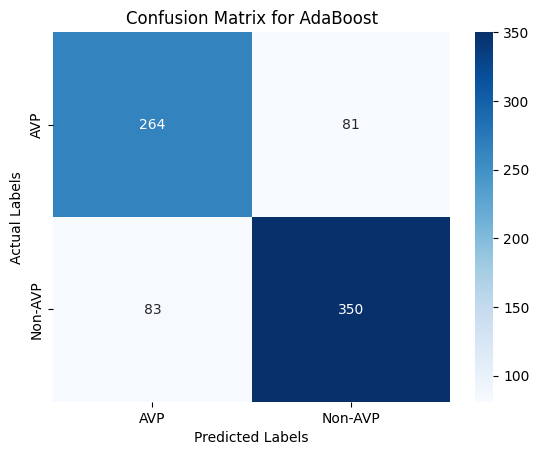

---------------------------------------
Model: XGBoost
Accuracy: 0.8573264781491002
Confusion Matrix:
[[288  57]
 [ 54 379]]
F1 Score: 0.8722669735327963
Recall: 0.8752886836027713
Precision: 0.8692660550458715
Mean Absolute Error: 0.14267352185089974
Root Mean Squared Error: 0.37772148714482706
ROC AUC Score: 0.8550356461492119
Specificity: 0.8347826086956521
Matthews Correlation Coefficient: 0.7107210080059414


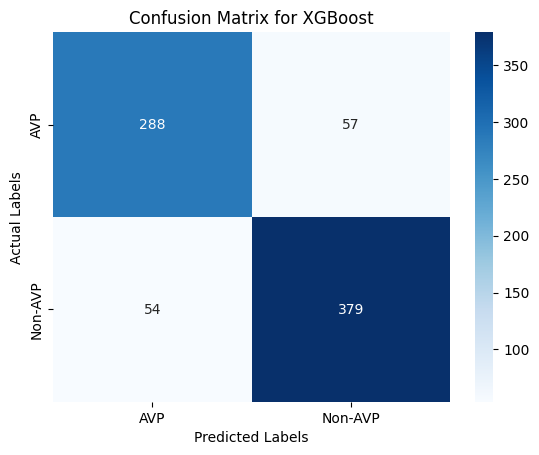

---------------------------------------
Model: Balanced RF


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8444730077120822
Confusion Matrix:
[[273  72]
 [ 49 384]]
F1 Score: 0.8638920134983127
Recall: 0.8868360277136259
Precision: 0.8421052631578947
Mean Absolute Error: 0.15552699228791775
Root Mean Squared Error: 0.3943691066601411
ROC AUC Score: 0.8390701877698563
Specificity: 0.7913043478260869
Matthews Correlation Coefficient: 0.6840104566914247


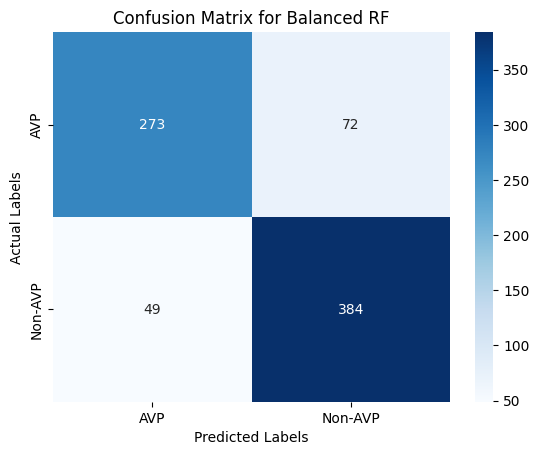

---------------------------------------
Model: Ensemble 1
Accuracy: 0.8547557840616966
Confusion Matrix:
[[284  61]
 [ 52 381]]
F1 Score: 0.870857142857143
Recall: 0.8799076212471132
Precision: 0.8619909502262444
Mean Absolute Error: 0.14524421593830333
Root Mean Squared Error: 0.38110919162138207
ROC AUC Score: 0.8515480135221074
Specificity: 0.8231884057971014
Matthews Correlation Coefficient: 0.7051595082506152


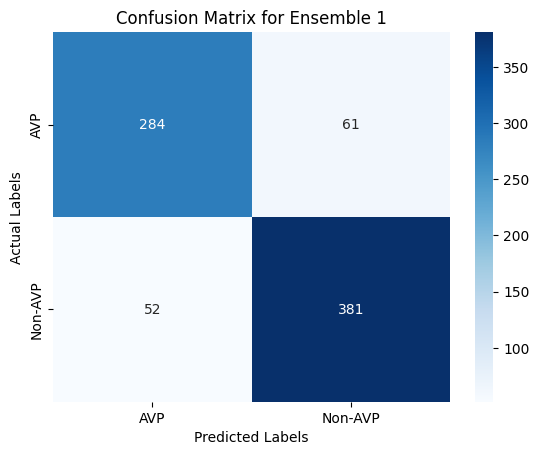

---------------------------------------
Model: Ensemble 2
Accuracy: 0.8624678663239075
Confusion Matrix:
[[295  50]
 [ 57 376]]
F1 Score: 0.8754365541327124
Recall: 0.8683602771362586
Precision: 0.8826291079812206
Mean Absolute Error: 0.13753213367609254
Root Mean Squared Error: 0.3708532508635896
ROC AUC Score: 0.8617163704521873
Specificity: 0.855072463768116
Matthews Correlation Coefficient: 0.7220637199873264


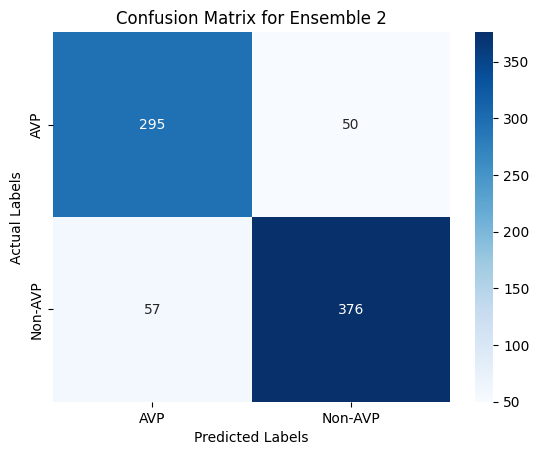

---------------------------------------
Model: Ensemble 3


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8560411311053985
Confusion Matrix:
[[291  54]
 [ 58 375]]
F1 Score: 0.8700696055684456
Recall: 0.8660508083140878
Precision: 0.8741258741258742
Mean Absolute Error: 0.14395886889460155
Root Mean Squared Error: 0.37941912035979625
ROC AUC Score: 0.8547645345918264
Specificity: 0.8434782608695652
Matthews Correlation Coefficient: 0.7087324686021995


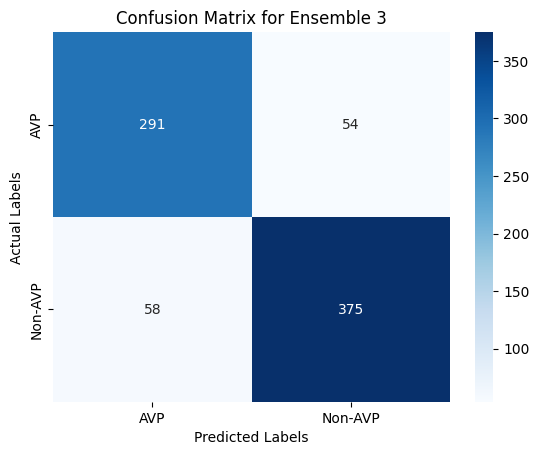

---------------------------------------
Model: Ensemble 4


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8637532133676092
Confusion Matrix:
[[294  51]
 [ 55 378]]
F1 Score: 0.877030162412993
Recall: 0.8729792147806005
Precision: 0.8811188811188811
Mean Absolute Error: 0.13624678663239073
Root Mean Squared Error: 0.3691162237458423
ROC AUC Score: 0.8625765639120393
Specificity: 0.8521739130434782
Matthews Correlation Coefficient: 0.7243389858412391


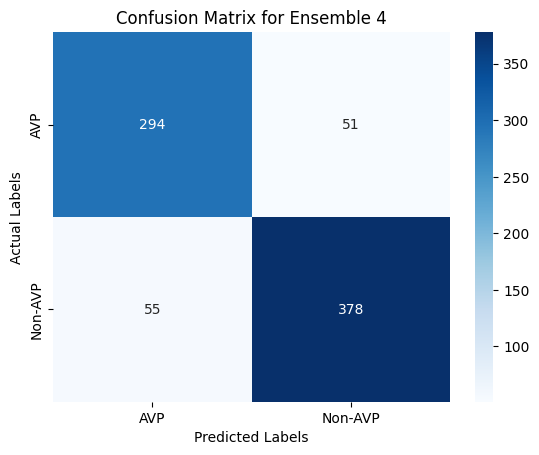

---------------------------------------


In [15]:
# Initialize lists for ROC data
roc_data = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Model: {name}")
    
    classifier.fit(X_train_balanced, y_train_balanced)
    y_pred = classifier.predict(X_test_combined)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Calculate F1 score, precision, recall, etc.
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Calculate Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate Matthews Correlation Coefficient
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Specificity: {specificity}")
    print(f"Matthews Correlation Coefficient: {mcc}")

    # Create and save a heatmap of the confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(f"Confusion Matrix for {name}")
    
    # Save the confusion matrix as an image file
    plt.savefig(f'Confusion_{name}.png', format='png', dpi=600, bbox_inches="tight")
    plt.show()  # Close the plot to avoid display

    # Store ROC curve data
    y_prob = classifier.predict_proba(X_test_combined)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Ensure ROC curve starts at (0, 0)
    fpr = np.concatenate([[0], fpr])  # Add 0 at the start
    tpr = np.concatenate([[0], tpr])  # Add 0 at the start
    roc_data[name] = (fpr, tpr, roc_auc)

    print("---------------------------------------")

# Li et al. 2020 (DeepAVP)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6165 - loss: 0.9756 - val_accuracy: 0.6899 - val_loss: 0.5983
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7066 - loss: 0.5965 - val_accuracy: 0.7081 - val_loss: 0.5721
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6905 - loss: 0.5957 - val_accuracy: 0.7051 - val_loss: 0.5612
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7236 - loss: 0.5481 - val_accuracy: 0.7293 - val_loss: 0.5257
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7353 - loss: 0.5280 - val_accuracy: 0.7434 - val_loss: 0.5108
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7365 - loss: 0.5133 - val_accuracy: 0.7293 - val_loss: 0.5249
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7497 - loss: 0.4990 - val_accuracy: 0.7475 - val_loss: 0.4917
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7608 - loss: 0.4885 - val_accuracy: 0.

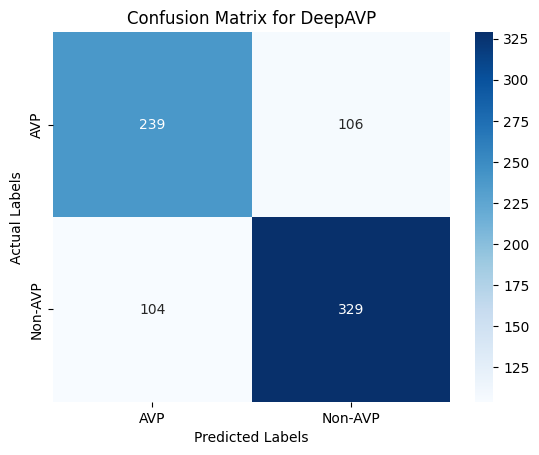

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, Flatten, Concatenate
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Define target and features
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare sequence data
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape for LSTM input
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Reshape the sequence data for LSTM input
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)

# Create the model
def build_hybrid_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM Channel
    lstm_out = LSTM(64)(inputs)
    lstm_out = Dropout(0.5)(lstm_out)
    
    # CNN Channel
    conv_out = Conv1D(32, kernel_size=3, activation='relu')(inputs)
    conv_out = Dropout(0.5)(conv_out)
    conv_out = Flatten()(conv_out)
    
    # Concatenate both channels
    combined = Concatenate()([lstm_out, conv_out])
    dense_out = Dense(64, activation='relu')(combined)
    output = Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')(dense_out)
    
    # Model setup
    model = Model(inputs, output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
DeepAVP = build_hybrid_model((max_sequence_length, 1))

# Train the model
DeepAVP.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
            epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

DeepAVP_loss, DeepAVP_accuracy = DeepAVP.evaluate(X_test_sequences_reshaped, y_test_categorical)
print(f'DeepAVP Accuracy: {DeepAVP_accuracy:.4f}')

# Collect ROC data for the DeepAVP model
y_pred_probs = DeepAVP.predict(X_test_sequences_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for DeepAVP")
plt.savefig('Confusion_DeepAVP.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['DeepAVP'] = (fpr, tpr, roc_auc)

# Singh et al. 2020 (Deep-AVPiden)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5422 - loss: 2.2039 - val_accuracy: 0.6182 - val_loss: 0.8688
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6701 - loss: 0.7027 - val_accuracy: 0.6929 - val_loss: 0.5772
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6886 - loss: 0.6041 - val_accuracy: 0.6889 - val_loss: 0.5680
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6723 - loss: 0.6049 - val_accuracy: 0.7020 - val_loss: 0.5668
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6957 - loss: 0.5816 - val_accuracy: 0.7020 - val_loss: 0.5658
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7101 - loss: 0.5717 - val_accuracy: 0.7111 - val_loss: 0.5708
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7124 - loss: 0.5759 - val_accuracy: 0.7172 - val_loss: 0.5542
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7061 - loss: 0.5808 - val_accuracy: 0.

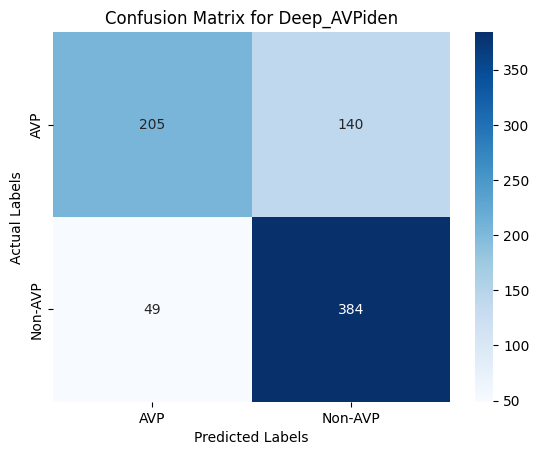

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Add, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust this line as needed

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape to fit input shape
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Split the balanced dataset back to sequence and other features
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part

# Reshape the sequence data for TCN input
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Define Temporal Convolutional Block
def tcn_block(inputs, filters, kernel_size, dilation_rate):
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(x)
    x = BatchNormalization()(x)
    return Add()([inputs, x])  # Residual connection

# Build Model
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = tcn_block(inputs, filters=32, kernel_size=3, dilation_rate=1)
    x = tcn_block(x, filters=32, kernel_size=3, dilation_rate=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)  # Single output for binary classification
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model
Deep_AVPiden = build_model((max_sequence_length, 1))

# Train the model
Deep_AVPiden.fit(X_train_balanced_reshaped, y_train_balanced, 
          epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
Deep_AVPiden_loss, Deep_AVPiden_accuracy = Deep_AVPiden.evaluate(X_test_sequences_reshaped, y_test)
print(f'Deep_AVPiden Accuracy: {Deep_AVPiden_accuracy:.4f}')

# Collect ROC data for the Deep_AVPiden model
y_pred_probs = Deep_AVPiden.predict(X_test_sequences_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Binarize predictions

# Calculate metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test, y_pred_probs)  # For binary classification
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPiden")
plt.savefig('Confusion_Deep_AVPiden.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # Assuming binary classification
roc_data['Deep_AVPiden'] = (fpr, tpr, roc_auc)

# Sharma et al. 2021 (Deep_AVPpred)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D, Input, BatchNormalization, Add
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust based on your dataset

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical if it's a classification problem
num_classes = len(np.unique(y))  # Adjust based on your target classes
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Reshape the balanced training data to include only the sequence part
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length]  # Select only the sequence part
X_test_sequences = X_test_combined[:, :max_sequence_length]  # Same for test

# Reshape to fit the model input shape
X_train_balanced_reshaped = X_train_sequences_balanced.reshape(X_train_sequences_balanced.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Define a ResNet-like architecture for 1D data
def resnet_block(input_tensor, filters):
    # First convolution block
    x = Conv1D(filters, kernel_size=3, padding='same', activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Adjust input tensor shape for residual connection
    if input_tensor.shape[-1] != filters:
        input_tensor = Conv1D(filters, kernel_size=1, padding='same')(input_tensor)  # 1x1 convolution to match shapes
        
    return Add()([input_tensor, x])  # Residual connection

# Build the model
inputs = Input(shape=(max_sequence_length, 1))
x = resnet_block(inputs, 64)
x = MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, 128)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)  # Use 'sigmoid' for binary classification

# Create and compile the model
Deep_AVPpred = Model(inputs=inputs, outputs=outputs)
Deep_AVPpred.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Deep_AVPpred.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
          epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
Deep_AVPpred_loss, Deep_AVPpred_accuracy = Deep_AVPpred.evaluate(X_test_reshaped, y_test_categorical)
print(f'Deep_AVPpred Accuracy: {Deep_AVPpred_accuracy:.4f}')

# Collect ROC data for the Deep_AVPpred model
y_pred_probs = Deep_AVPpred.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPpred")
plt.savefig('Confusion_Deep_AVPpred.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['Deep_AVPpred'] = (fpr, tpr, roc_auc)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6522 - loss: 0.6892 - val_accuracy: 0.7076 - val_loss: 0.5920
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7073 - loss: 0.5667 - val_accuracy: 0.7197 - val_loss: 0.5438
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7051 - loss: 0.5684 - val_accuracy: 0.7152 - val_loss: 0.5354
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7280 - loss: 0.5393 - val_accuracy: 0.7227 - val_loss: 0.5195
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7264 - loss: 0.5365 - val_accuracy: 0.6303 - val_loss: 0.6706
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7513 - loss: 0.5221 - val_accuracy: 0.7045 - val_loss: 0.5084
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7398 - loss: 0.5255 - val_accuracy: 0.7030 - val_loss: 0.5123
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7661 - loss: 0.4667 - val_accuracy: 0.

# Akbar et al. 2022 (Ensemble_Learner)

SVM Accuracy: 0.7017994858611826
ADA Accuracy: 0.7300771208226221
Generation 0: Best fitness = 0.800771208226221
Generation 1: Best fitness = 0.800771208226221
Generation 2: Best fitness = 0.800771208226221
Generation 3: Best fitness = 0.8059125964010283
Generation 4: Best fitness = 0.8059125964010283
Generation 5: Best fitness = 0.8059125964010283
Generation 6: Best fitness = 0.8059125964010283
Generation 7: Best fitness = 0.8059125964010283
Generation 8: Best fitness = 0.8059125964010283
Generation 9: Best fitness = 0.8059125964010283
Generation 10: Best fitness = 0.8059125964010283
Generation 11: Best fitness = 0.8059125964010283
Generation 12: Best fitness = 0.8059125964010283
Generation 13: Best fitness = 0.8059125964010283
Generation 14: Best fitness = 0.8059125964010283
Generation 15: Best fitness = 0.8059125964010283
Generation 16: Best fitness = 0.8059125964010283
Generation 17: Best fitness = 0.8059125964010283
Generation 18: Best fitness = 0.8059125964010283
Generation 19: B

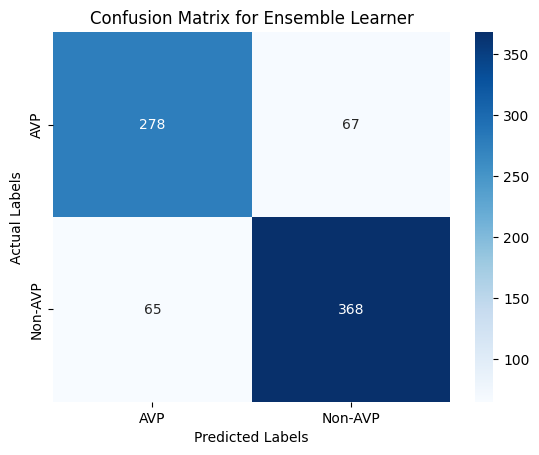

In [19]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier,
                              RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the padded sequences to a numpy array
X_train_sequences_flat = np.array(sequences_padded[:len(X_train)])
X_test_sequences_flat = np.array(sequences_padded[len(X_train):])

# Combine the flattened sequence data with numeric features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Initialize classifiers
classifiers = {
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "ETC": ExtraTreesClassifier(n_estimators=100, max_depth=5),
    "SVM": SVC(probability=True),
    "ADA": AdaBoostClassifier(n_estimators=100)
}

# Train classifiers and collect predictions
predictions = []
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)  # Use balanced data here
    y_pred = clf.predict(X_test_combined)  # Use combined data here
    predictions.append(y_pred)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Genetic Algorithm (simple ensemble)
# Initialize random population of classifier weights
population_size = 10
num_classifiers = len(classifiers)
num_generations = 50
mutation_rate = 0.1

def initialize_population(size, num_classifiers):
    return np.random.rand(size, num_classifiers)

def fitness(weights, predictions, y_true):
    weighted_preds = np.zeros_like(predictions[0], dtype=float)
    for i in range(num_classifiers):
        weighted_preds += weights[i] * predictions[i]
    final_preds = np.round(weighted_preds / np.sum(weights))  # Final ensemble decision
    return accuracy_score(y_true, final_preds)

def mutate(weights):
    if np.random.rand() < mutation_rate:
        idx = np.random.randint(0, len(weights))
        weights[idx] = np.random.rand()
    return weights

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, num_classifiers)
    child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    return child

# Genetic Algorithm Loop
population = initialize_population(population_size, num_classifiers)

for generation in range(num_generations):
    # Evaluate fitness of each individual
    fitness_scores = [fitness(ind, predictions, y_test) for ind in population]
    
    # Select the best individuals (elitism)
    sorted_idx = np.argsort(fitness_scores)[::-1]
    population = [population[i] for i in sorted_idx[:population_size // 2]]
    
    # Crossover and mutation
    for _ in range(population_size // 2):
        parent_indices = np.random.choice(len(population), size=2, replace=False)
        parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
        child = mutate(crossover(parent1, parent2))
        population.append(child)
    
    # Best individual
    best_fitness = max(fitness_scores)
    print(f"Generation {generation}: Best fitness = {best_fitness}")

# Use the best weights for final predictions
best_weights = population[np.argmax(fitness_scores)]
weighted_preds = np.zeros_like(predictions[0], dtype=float)
for i in range(num_classifiers):
    weighted_preds += best_weights[i] * predictions[i]

final_preds = np.round(weighted_preds / np.sum(best_weights))
print(f"\n\nEnsemble Learner Accuracy: {accuracy_score(y_test, final_preds)}")

# Collect ROC data for the ensemble model
y_pred_probs = np.zeros((len(y_test), len(classifiers)))  # Collect probabilities for ROC
for i, clf in enumerate(classifiers.values()):
    y_pred_probs[:, i] = clf.predict_proba(X_test_combined)[:, 1]

roc_auc = roc_auc_score(y_test, np.mean(y_pred_probs, axis=1))  # Average probabilities for ROC AUC

# Calculate metrics
f1 = f1_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
mae = mean_absolute_error(y_test, final_preds)
rmse = mean_squared_error(y_test, final_preds, squared=False)
cm = confusion_matrix(y_test, final_preds)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Ensemble Learner")
plt.savefig('Confusion_Ensemble_Learner.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, np.mean(y_pred_probs, axis=1))  # Assuming binary classification

roc_data['Ensemble_Learner'] = (fpr, tpr, roc_auc)

# Yan et al. 2024 (AntiCVP-Deep)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5862 - loss: 0.6656 - val_accuracy: 0.6455 - val_loss: 0.6108
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6953 - loss: 0.5848 - val_accuracy: 0.6818 - val_loss: 0.5636
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6920 - loss: 0.5772 - val_accuracy: 0.7076 - val_loss: 0.5369
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7033 - loss: 0.5671 - val_accuracy: 0.6788 - val_loss: 0.5643
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7002 - loss: 0.5848 - val_accuracy: 0.6773 - val_loss: 0.5664
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6918 - loss: 0.5742 - val_accuracy: 0.6682 - val_loss: 0.5711
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7135 - loss: 0.5655 - val_accuracy: 0.7197 - val_loss: 0.5209
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7171 - loss: 0.5519 - val_accuracy: 0.

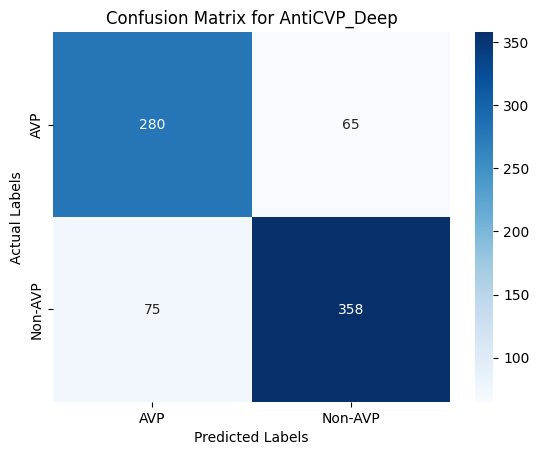

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, Attention, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Prepare sequence data
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}
sequences_encoded = [[amino_acid_to_index[amino_acid] for amino_acid in sequence] for sequence in data['Sequence']]
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')

# Prepare target variable
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sequences = sequences_padded[X_train.index]
X_test_sequences = sequences_padded[X_test.index]

# Reshape for LSTM
X_train_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine numerical features with sequence data for SMOTE
X_train_combined = np.hstack((X_train.values, X_train_sequences))
X_test_combined = np.hstack((X_test.values, X_test_sequences))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Final reshape for the LSTM
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)
X_test_sequences = X_test_combined[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)

# Define the model
def create_anticvp_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    attention = Attention()([x, x])
    x = GlobalAveragePooling1D()(attention)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
AntiCVP_Deep = create_anticvp_model((max_sequence_length, 1))

# Train the model
AntiCVP_Deep.fit(X_train_sequences_balanced, y_train_balanced_categorical, 
                 epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
AntiCVP_Deep_loss, AntiCVP_Deep_accuracy = AntiCVP_Deep.evaluate(X_test_sequences, y_test_categorical)
print(f'AntiCVP_Deep Accuracy: {AntiCVP_Deep_accuracy:.4f}')

# Predictions for evaluation metrics
y_pred_probs = AntiCVP_Deep.predict(X_test_sequences)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for AntiCVP_Deep")
plt.savefig('Confusion_AntiCVP_Deep.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification

roc_data['AntiCVP_Deep'] = (fpr, tpr, roc_auc)

# Roc Curve

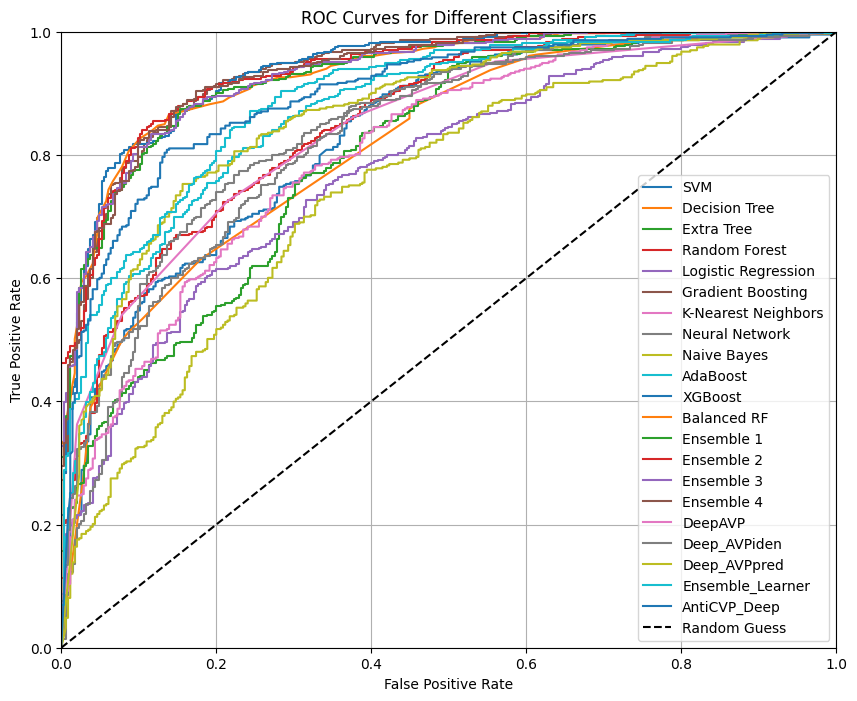

In [21]:
# Plot all ROC curves in a single plot
Rocsaved = plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set the axis limits to start from (0, 0)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid()

# Save the ROC curve figure
Rocsaved.savefig('ROC Curve.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# K - Fold Validation

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Modeling
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error,
    mean_squared_error, roc_auc_score, confusion_matrix
)

# Sequence Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling Imbalance
from imblearn.over_sampling import SMOTE

# Load Dataset
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Clean column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Define relevant columns
numeric_columns = ['molecular weight', 'Theoretical Pi', 'Extinction coefficient',
                   'Half life(hours)', 'Instability index', 'Aliphatic index',
                   'GRAVY', 'Hydrophobic residue :', 'Net charge:',
                   'Boman Index:(Kcal/mol)', 'Protective Antigenic Score']

# Convert and fill missing
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Encode 'Allergenicity'
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Standardize features
scaler = StandardScaler()
data[numeric_columns + ['Allergenicity']] = scaler.fit_transform(data[numeric_columns + ['Allergenicity']])

# Encode sequence
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {aa: i for i, aa in enumerate(all_amino_acids)}
encoded_sequences = [[amino_acid_to_index[aa] for aa in seq] for seq in data['Sequence']]
max_seq_len = max(len(seq) for seq in encoded_sequences)
sequences_padded = pad_sequences(encoded_sequences, maxlen=max_seq_len, padding='post')
sequence_array = np.array(sequences_padded)

# Target
if 'property = 1' in data.columns:
    y = data['property = 1'].values
else:
    raise ValueError("Column 'property = 1' not found in dataset.")

# Feature matrix
numeric_array = data[numeric_columns + ['Allergenicity']].values
X_full = np.hstack((sequence_array, numeric_array))

# Classifier
ensemble = VotingClassifier(estimators=[
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, max_features='sqrt', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42))
], voting='soft')

# Cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Metrics lists
acc_list, prec_list, rec_list, f1_list = [], [], [], []
mae_list, rmse_list, roc_auc_list = [], [], []
specificity_list, mcc_list = [], []

# Start loop
for fold, (train_index, test_index) in enumerate(kf.split(X_full, y), 1):
    X_train_fold, X_test_fold = X_full[train_index], X_full[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)

    # Train
    ensemble.fit(X_train_res, y_train_res)
    y_pred_fold = ensemble.predict(X_test_fold)
    y_prob_fold = ensemble.predict_proba(X_test_fold)[:, 1]

    # Metrics
    acc_list.append(accuracy_score(y_test_fold, y_pred_fold))
    prec_list.append(precision_score(y_test_fold, y_pred_fold))
    rec_list.append(recall_score(y_test_fold, y_pred_fold))
    f1_list.append(f1_score(y_test_fold, y_pred_fold))
    mae_list.append(mean_absolute_error(y_test_fold, y_pred_fold))
    rmse_list.append(mean_squared_error(y_test_fold, y_pred_fold, squared=False))
    roc_auc_list.append(roc_auc_score(y_test_fold, y_prob_fold))

    cm = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_list.append(specificity)

    denom = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt(denom) if denom > 0 else 0
    mcc_list.append(mcc)

    print(f"""
Fold {fold} —
    Accuracy:       {acc_list[-1]:.4f}
    Precision:      {prec_list[-1]:.4f}
    Recall:         {rec_list[-1]:.4f}
    F1 Score:       {f1_list[-1]:.4f}
    MAE:            {mae_list[-1]:.4f}
    RMSE:           {rmse_list[-1]:.4f}
    ROC AUC Score:  {roc_auc_list[-1]:.4f}
    Specificity:    {specificity_list[-1]:.4f}
    MCC:            {mcc_list[-1]:.4f}
""")


# Average results
print("\n=== Average Metrics over 10 Folds ===")
print(f"Accuracy:  {np.mean(acc_list):.4f}")
print(f"Precision: {np.mean(prec_list):.4f}")
print(f"Recall:    {np.mean(rec_list):.4f}")
print(f"F1 Score:  {np.mean(f1_list):.4f}")
print(f"MAE:       {np.mean(mae_list):.4f}")
print(f"RMSE:      {np.mean(rmse_list):.4f}")
print(f"ROC AUC:   {np.mean(roc_auc_list):.4f}")
print(f"Specificity: {np.mean(specificity_list):.4f}")
print(f"MCC:         {np.mean(mcc_list):.4f}")


Fold 1 —
    Accuracy:       0.8586
    Precision:      0.8775
    Recall:         0.8565
    F1 Score:       0.8668
    MAE:            0.1414
    RMSE:           0.3760
    ROC AUC Score:  0.9350
    Specificity:    0.8611
    MCC:            0.7164


Fold 2 —
    Accuracy:       0.8920
    Precision:      0.8813
    Recall:         0.9234
    F1 Score:       0.9019
    MAE:            0.1080
    RMSE:           0.3286
    ROC AUC Score:  0.9447
    Specificity:    0.8556
    MCC:            0.7831


Fold 3 —
    Accuracy:       0.8663
    Precision:      0.8980
    Recall:         0.8462
    F1 Score:       0.8713
    MAE:            0.1337
    RMSE:           0.3656
    ROC AUC Score:  0.9380
    Specificity:    0.8895
    MCC:            0.7339


Fold 4 —
    Accuracy:       0.8458
    Precision:      0.8333
    Recall:         0.8894
    F1 Score:       0.8605
    MAE:            0.1542
    RMSE:           0.3927
    ROC AUC Score:  0.9291
    Specificity:    0.7956
    MCC:    